In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
plt.style.use('fivethirtyeight')

# This makes sure that graphs render in your notebook
%matplotlib inline

In [23]:
#original data source: https://www.kaggle.com/dansbecker/nba-shot-logs/version/1#
Path = "./PRDataSets/" #. signifies home directory i.e. defalult working directory
FileName = "shot_logs.csv"
print(Path + FileName)
NBAData =pd.read_csv(Path + FileName) #reads CSV file into a data frame


./PRDataSets/shot_logs.csv


In [50]:
NBAData.head(2)


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148


In [52]:
print(NBAData.shape)
print(NBAData.dtypes)
#NBAData.info()
#NBAData.columns

(128069, 21)
GAME_ID                         int64
MATCHUP                        object
LOCATION                       object
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                    float64
DRIBBLES                        int64
TOUCH_TIME                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
player_name                    object
player_id                       int64
dtype: object


In [30]:
NBAData.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


In [46]:
#print(NBAData.SHOT_DIST.mode())
#print(NBAData.SHOT_DIST.value_counts())
NBAData.mode()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400248,"FEB 07, 2015 - DAL vs. POR",A,W,-5,1,1,0:01,24.0,0,...,24.4,2,missed,"Ibaka, Serge",201586,2.2,0,0,james harden,201935


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000019F11BE0>,
      dtype=object)

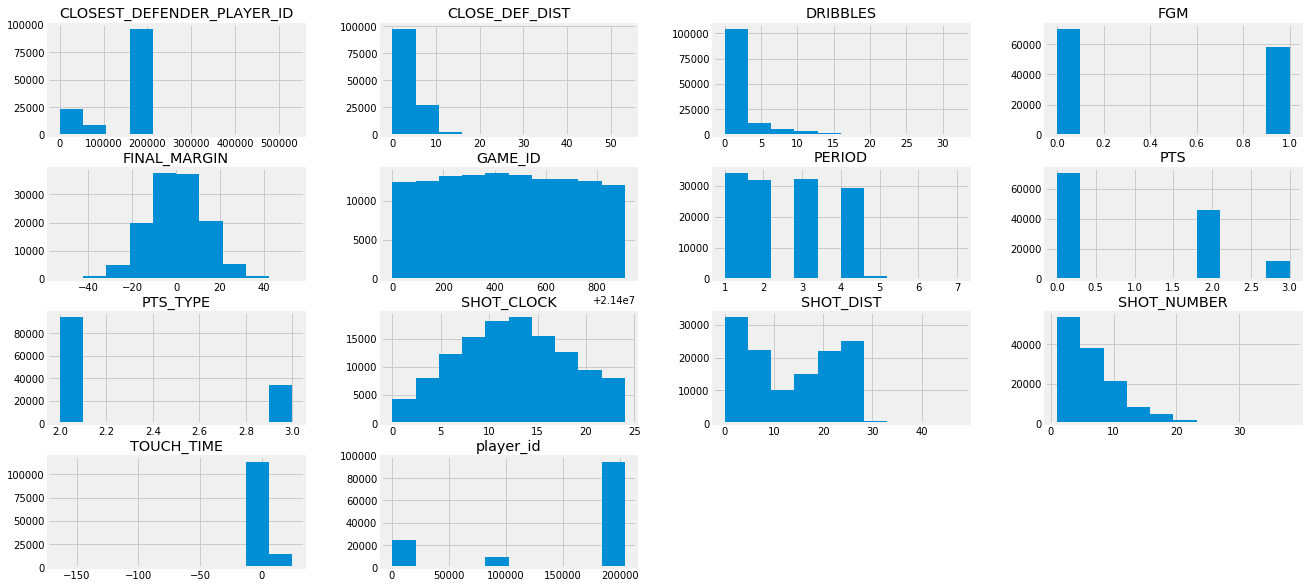

In [26]:
NBAData.hist(figsize=(20, 10))

In [35]:
NBAData.corr()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
GAME_ID,1.000000,0.001726,0.008129,-0.008921,0.014530,0.002014,-0.000735,-0.000187,0.003418,0.028676,0.006739,-0.008761,-0.008464,0.027937
FINAL_MARGIN,0.001726,1.000000,0.000836,-0.003078,-0.009276,0.011739,0.010788,0.008876,0.024134,0.057165,0.033064,0.058762,0.064784,-0.050825
SHOT_NUMBER,0.008129,0.000836,1.000000,0.654932,-0.032683,0.141100,0.144071,0.011541,0.003054,0.013257,-0.037769,-0.008351,-0.009666,-0.006592
PERIOD,-0.008921,-0.003078,0.654932,1.000000,-0.051796,0.055301,0.046089,0.030080,0.048915,0.011462,-0.010204,-0.014082,-0.008501,0.004790
SHOT_CLOCK,0.014530,-0.009276,-0.032683,-0.051796,1.000000,-0.082771,-0.147688,-0.173026,-0.032809,-0.003289,0.026558,0.096855,0.084173,0.038315
DRIBBLES,0.002014,0.011739,0.141100,0.055301,-0.082771,1.000000,0.914311,-0.082540,-0.169016,0.016915,-0.153674,-0.034390,-0.055689,0.023655
TOUCH_TIME,-0.000735,0.010788,0.144071,0.046089,-0.147688,0.914311,1.000000,-0.085165,-0.181007,0.016225,-0.164737,-0.045299,-0.066736,0.001797
SHOT_DIST,-0.000187,0.008876,0.011541,0.030080,-0.173026,-0.082540,-0.085165,1.000000,0.740933,0.002777,0.523192,-0.191704,-0.069147,-0.024270
PTS_TYPE,0.003418,0.024134,0.003054,0.048915,-0.032809,-0.169016,-0.181007,0.740933,1.000000,0.006266,0.414198,-0.121293,0.030361,0.010486
CLOSEST_DEFENDER_PLAYER_ID,0.028676,0.057165,0.013257,0.011462,-0.003289,0.016915,0.016225,0.002777,0.006266,1.000000,-0.015057,-0.002633,-0.002046,-0.002317


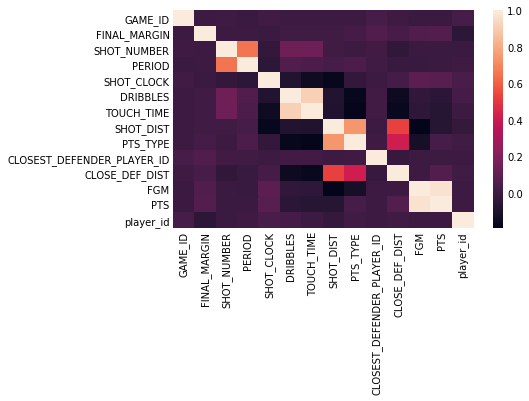

In [53]:
# NBA_correlations = NBAData.corr();
sns.heatmap(NBA_correlations);

In [ ]:
RemoveNonNumbers = NBAData.dropna()
sns.pairplot(RemoveNonNumbers);